In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Loading

In [86]:
df = pd.read_csv('Salary_Data.csv')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Splitting

In [116]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Train size:",X_train.shape)
print("Test size:",X_test.shape)

Train size: (21, 1)
Test size: (9, 1)


# Training Linear Regression Model

### Linear Regression main equation:

$y = wX + b$

Where:
- \( y \) is the predicted output,
- \( X \) is the input feature,
- \( w \) is the weight (coefficient),
- \( b \) is the bias (intercept).
---
### Equations for computing gradients:

$\frac{\partial MSE}{\partial w} = -\frac{2}{n} \sum X \times (y_{\text{true}} - y_{\text{pred}})$

$\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum (y_{\text{true}} - y_{\text{pred}})$

---
### Updating weight and bias using Gradient Descent

$w = w - \alpha \times \frac{\partial MSE}{\partial w}$

$b = b - \alpha \times \frac{\partial MSE}{\partial b}$

In [106]:
def predict(X, w, b):
    return X.dot(w) + b

row, col = X_train.shape
learning_rate = 0.01
iterations = 100
w = np.zeros(col)
b = 0
x = X_train
y = y_train
n = row

for i in range(iterations):
    y_pred = predict(x, w, b)
    
    error = y - y_pred
    
    dw = -(2/n) * sum((x.T).dot(error))
    db = -(2/n) * sum(error)
    
    w = w - learning_rate * dw
    b = b - learning_rate * db


# Testing The Model

In [107]:
y_pred = predict(X_test, w, b)

ssRes = sum(pow(y_test - y_pred,2))
ssTot = sum(pow(y_test - (sum(y_test)/len(y_test)),2))
R2 = 1 - ssRes/ssTot

print("R2 Score:",R2)

R2 Score: 0.9263113826284276


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). 
(Source:[CorporateFinanceInstitute.com](https://corporatefinanceinstitute.com/resources/data-science/r-squared/#:~:text=R%2DSquared%20(R%C2%B2%20or%20the,(the%20goodness%20of%20fit).)))

Interpretation of R² Score
- Close to 1: The model explains most of the variability in the target variable.
- Close to 0: The model does not explain much variability.
- Negative: The model performs worse than simply predicting the mean.

This model results R² score of 0.926 which means the model performs very good.

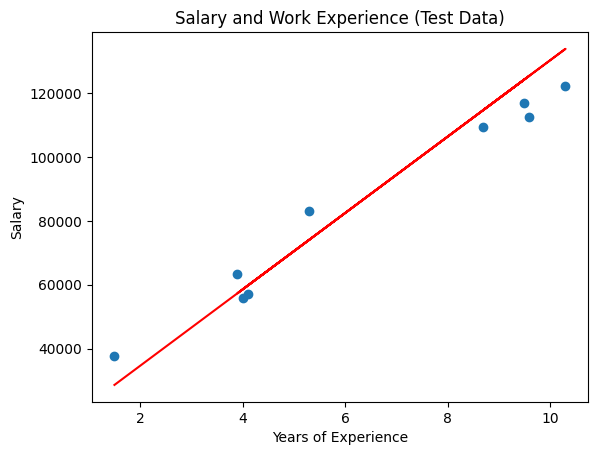

In [115]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary and Work Experience (Test Data)")
plt.show()